# 01 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

# 02 Importing data

In [2]:
path = r'/Users/woodoooo/Desktop/Instacart Basket Analysis'

df_ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9_ords_prods_customers.pkl'))

In [33]:
#departments data 
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [4]:
df_ords_prods_customers.shape

(32404859, 34)

In [6]:
df_ords_prods_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int32         
 1   user_id                      int32         
 2   order_number                 int8          
 3   order_day_of_week            int8          
 4   order_hour_of_day            int8          
 5   days_since_prior_order       float32       
 6   new_customer                 bool          
 7   product_id                   int32         
 8   add_to_cart_order            int32         
 9   reordered                    int8          
 10  product_name                 object        
 11  aisle_id                     int32         
 12  department_id                int32         
 13  prices                       float32       
 14  price_range_loc              object        
 15  Busiest day                  object        
 16

In [8]:
df_ords_prods_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


In [10]:
pd.set_option('display.max_columns', None)

In [11]:
df_ords_prods_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,avg_spending_flag,user_median_order_frequency,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


# 03 Creating visualisations 

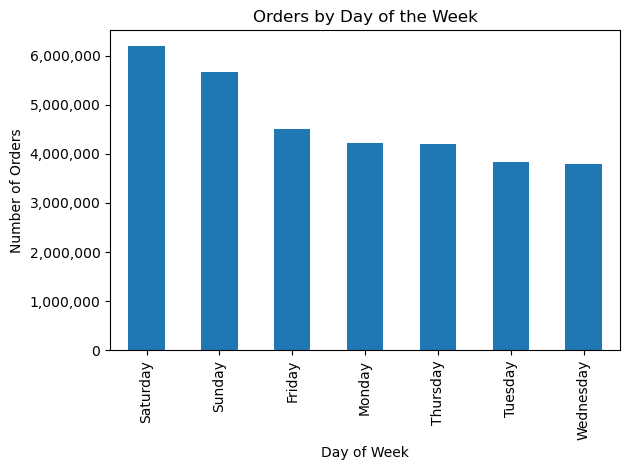

In [5]:
# Map numbers to day names
day_map = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Replace numeric codes with names
df_orders_by_day = df_ords_prods_customers['order_day_of_week'].map(day_map).value_counts()

# Plot
bar_1 = df_orders_by_day.plot.bar()

# Format Y-axis to show full numbers
bar_1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add title and axis labels
bar_1.set_title('Orders by Day of the Week', fontsize=12)
bar_1.set_xlabel('Day of Week', fontsize=10)
bar_1.set_ylabel('Number of Orders', fontsize=10)

plt.tight_layout()

In [15]:
df_ords_prods_customers['order_day_of_week'].value_counts()

order_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

Most orders are placed on Saturday and Sunday, making weekends the busiest shopping days. Orders steadily decline during the week, with Tuesday and Wednesday seeing the fewest purchases.

Text(0, 0.5, 'Frequency')

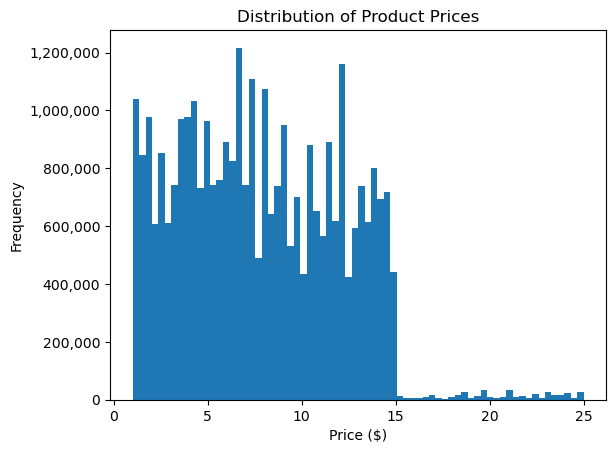

In [41]:
# Create the histogram
histogram_1 = df_ords_prods_customers['prices'].plot.hist(bins=70)

# Format Y-axis to show full numbers (no scientific notation)
histogram_1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add title and axis labels
histogram_1.set_title('Distribution of Product Prices', fontsize=12)
histogram_1.set_xlabel('Price ($)', fontsize=10)
histogram_1.set_ylabel('Frequency', fontsize=10)

In [23]:
df_ords_prods_customers['prices'].describe()

count    3.240486e+07
mean     7.790887e+00
std      4.100591e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

Most products are priced between `$1` and `$15`, with a clear peak in the lower price range, while prices above $15 are much less common. This shows that the vast majority of Instacart items are relatively low-cost everyday goods.

In [32]:
avg_prices = df_ords_prods_customers.groupby('order_day_of_week')['prices'].mean().reset_index()

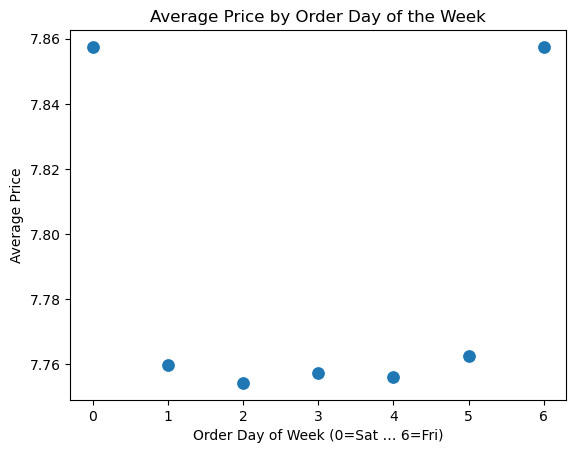

In [46]:
scatterplot_1 = sns.scatterplot(x='order_day_of_week', y='prices', data=avg_prices, s=100)

scatterplot_1.set_title('Average Price by Order Day of the Week', fontsize=12)
scatterplot_1.set_xlabel('Order Day of Week (0=Sat … 6=Fri)', fontsize=10)
scatterplot_1.set_ylabel('Average Price', fontsize=10)

plt.show()

In [34]:
avg_prices_by_hour = df_ords_prods_customers.groupby('order_hour_of_day')['prices'].mean().reset_index()

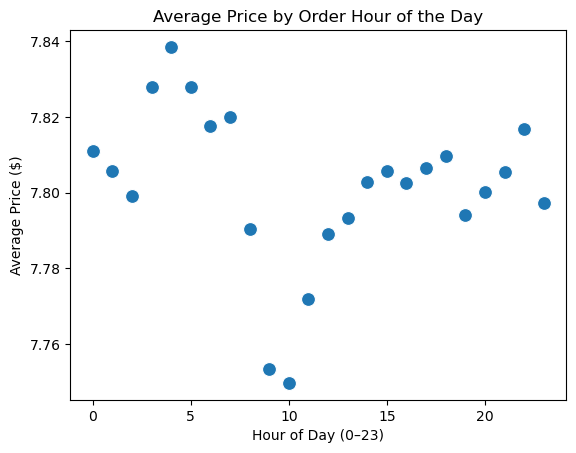

In [47]:
scatterplot_2 = sns.scatterplot(x='order_hour_of_day', y='prices', data=avg_prices_by_hour, s=100)

scatterplot_2.set_title('Average Price by Order Hour of the Day', fontsize=12)
scatterplot_2.set_xlabel('Hour of Day (0–23)', fontsize=10)
scatterplot_2.set_ylabel('Average Price ($)', fontsize=10)

plt.show()

In [48]:
avg_spending_by_age = df_ords_prods_customers.groupby('age')['prices'].mean().reset_index()

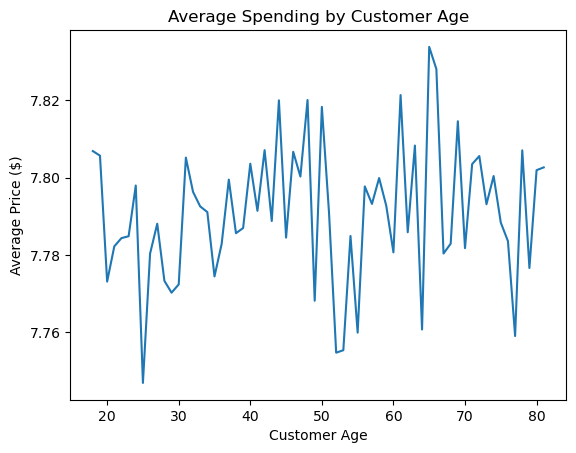

In [52]:
linechart_1 = avg_spending_by_age.plot(x='age', y='prices', kind='line', legend=False)

linechart_1.set_title('Average Spending by Customer Age', fontsize=12)
linechart_1.set_xlabel('Customer Age', fontsize=10)
linechart_1.set_ylabel('Average Price ($)', fontsize=10)

plt.show()

# 04 Business questions

### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.


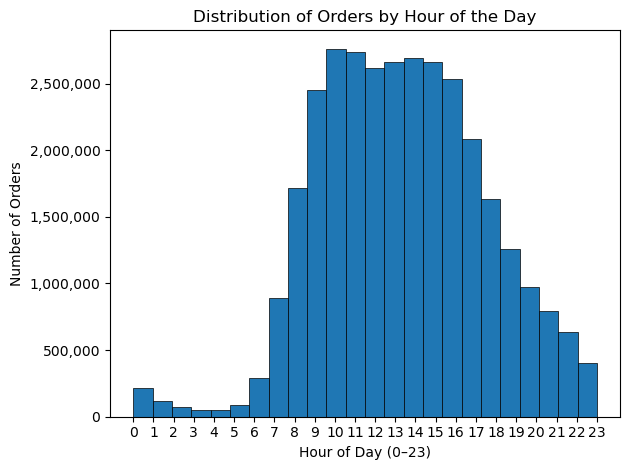

In [21]:
# Plot histogram with an outline around each bar
histogram_1 = plt.hist(
    df_ords_prods_customers['order_hour_of_day'],
    bins=24,                # one bin per hour
    edgecolor='black',      # outline color
    linewidth=0.5           # outline thickness
)

# Show all hours from 0 to 23 on the X-axis
plt.xticks(np.arange(0, 24, 1))

# Format Y-axis to show full numbers with commas
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add title and axis labels
plt.title('Distribution of Orders by Hour of the Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Orders')

# Adjust layout so nothing is cut off
plt.tight_layout()

# Save plt.show()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'histogram_1.png'))

# Display the plot
plt.show()

The histogram shows that most Instacart orders are placed between late morning and early afternoon (around 9 AM–3 PM). Order activity starts rising after 6 AM, peaks mid‑day, and then steadily declines into the evening and overnight hours.

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

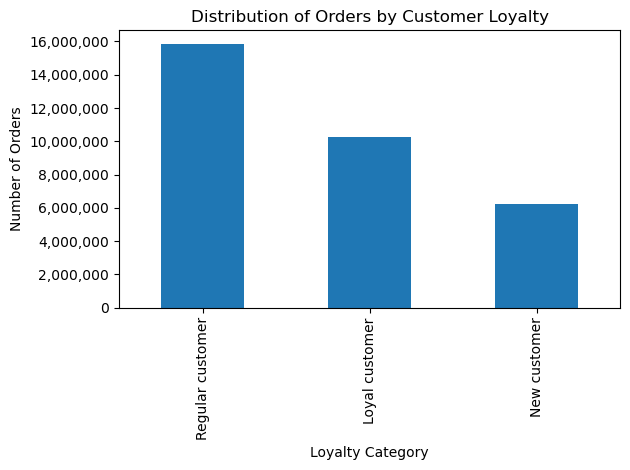

In [40]:
bar_loyalty = df_ords_prods_customers['loyalty_flag'].value_counts().plot.bar()

bar_loyalty.set_title('Distribution of Orders by Customer Loyalty', fontsize=12)
bar_loyalty.set_xlabel('Loyalty Category', fontsize=10)
bar_loyalty.set_ylabel('Number of Orders', fontsize=10)

# Format Y-axis to show full numbers
bar_loyalty.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()

plt.show()

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [3]:
np.random.seed(4)

In [4]:
dev = np.random.rand(len(df_ords_prods_customers)) <= 0.7

In [5]:
big = df_ords_prods_customers[dev]

In [6]:
small = df_ords_prods_customers[~dev]

In [7]:
len(big), len(small), len(big) + len(small)

(22683761, 9721098, 32404859)

In [69]:
df_ords_prods_customers.shape

(32404859, 34)

In [13]:
small['prices'].max()

25.0

In [14]:
small['prices'].min()

1.0

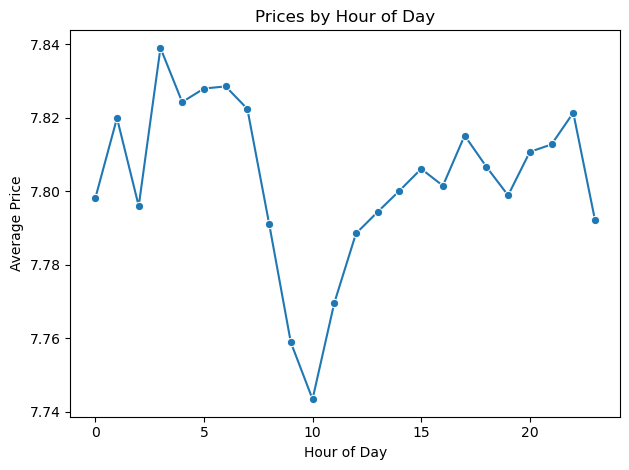

In [17]:
# 1) Pre-aggregate to 24 points
hour_mean = (
    small.groupby('order_hour_of_day', as_index=False)['prices']
         .mean()
         .rename(columns={'prices':'price_mean'})
)

# 2) Plot the 24-point line
sns.lineplot(
    data=hour_mean,
    x='order_hour_of_day',
    y='price_mean',
    marker='o',         
)

plt.title('Prices by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'linechart_1.png'), dpi=300)
plt.show()

The line chart illustrates how average spending (price per product) changes by hour of the day. Prices remain largely stable across the day, with only slight fluctuations: a small increase in the early morning (around 3–6 AM) and a noticeable dip late morning (around 9–11 AM) before stabilizing again through the afternoon and evening. Overall, there’s no major variation in spending by hour, suggesting customers buy similarly priced items throughout the day.

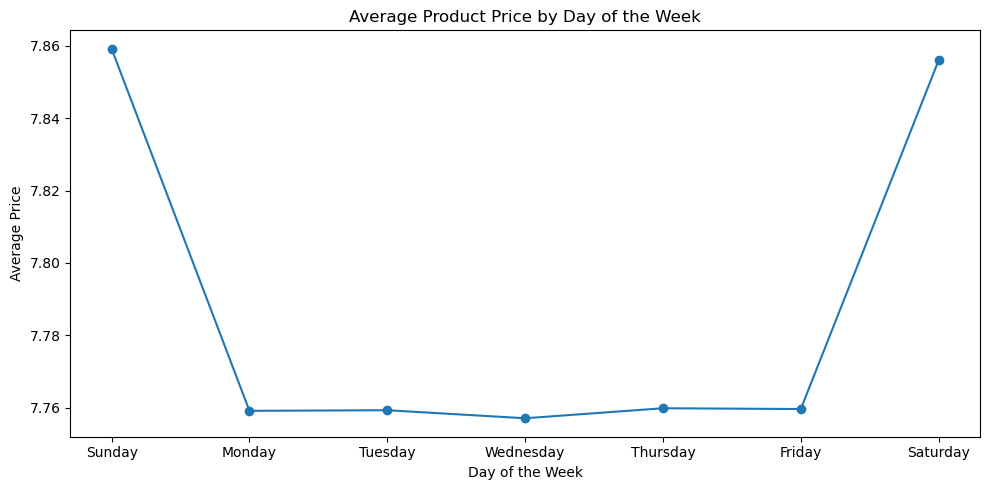

In [21]:
# Map numbers to day names
day_names = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Group data by day of the week and calculate the average price
avg_price_by_dow = small.groupby('order_day_of_week')['prices'].mean().reset_index()

# Replace numeric day codes with names
avg_price_by_dow['order_day_of_week'] = avg_price_by_dow['order_day_of_week'].map(day_names)

# Create a line chart of average price by day of the week
plt.figure(figsize=(10,5))
plt.plot(avg_price_by_dow['order_day_of_week'], avg_price_by_dow['prices'], marker='o')

# Add title and axis labels
plt.title('Average Product Price by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')

# Save chart in project folder '04 Analysis/Visualizations'
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'linechart_2.png'), dpi=300)

# Show the chart
plt.tight_layout()
plt.show()

In [27]:
df_ords_prods_customers['price_range_loc'].value_counts(dropna=False)

price_range_loc
Mid-range     21865987
Low-range     10126321
High-range      412551
Name: count, dtype: int64

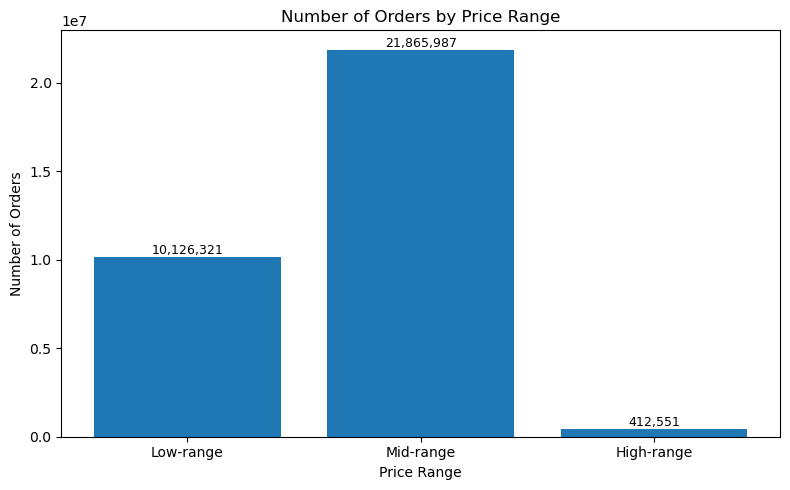

In [30]:
# Calculate number of orders per price range (Low → Mid → High)
price_counts = (
    df_ords_prods_customers
    .groupby('price_range_loc')
    .size()
    .reindex(['Low-range', 'Mid-range', 'High-range'])
)

# Create bar chart: "Number of Orders by Price Range"
plt.figure(figsize=(8,5))
bars = plt.bar(price_counts.index, price_counts.values)

# Add labels and title
plt.title('Number of Orders by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Orders')

# Show actual values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:,}',  # thousand separator
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()

# Save chart to project folder (300 dpi)
plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'barchart_price_range.png'),
    dpi=300
)

plt.show()

### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:


In [77]:
# 1️⃣ Create age groups
df_ords_prods_customers['age_group'] = pd.cut(
    df_ords_prods_customers['age'],
    bins=[17, 25, 35, 45, 55, 65, 80],
    labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-80']
)

In [83]:
# Group by age_group_mode
age_group_dependents_mode = df_ords_prods_customers.groupby(
    'age_group', observed=True
)['n_dependants'].agg(lambda x: x.mode()[0]).reset_index()

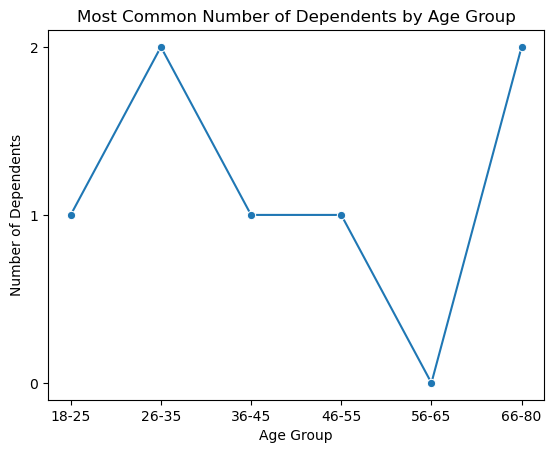

In [88]:
# Linechart
linechart_3 = sns.lineplot(data=age_group_dependents_mode, x='age_group', y='n_dependants', marker='o')
linechart_3.set_title('Most Common Number of Dependents by Age Group', fontsize=12)
linechart_3.set_xlabel('Age Group', fontsize=10)
linechart_3.set_ylabel('Number of Dependents', fontsize=10)

linechart_3.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

The number of dependents is mostly consistent across age groups, with most having 1 dependent. The 26–35 and 66–80 age groups show a slightly higher count of 2 dependents, suggesting young parents with children and older adults supporting family members in multi-generational households.

### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.


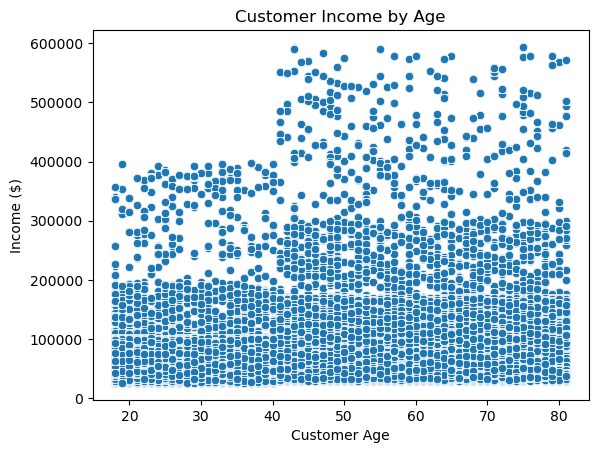

In [89]:
scatterplot_4 = sns.scatterplot(data=df_ords_prods_customers, x='age', y='income')

scatterplot_4.set_title('Customer Income by Age', fontsize=12)
scatterplot_4.set_xlabel('Customer Age', fontsize=10)
scatterplot_4.set_ylabel('Income ($)', fontsize=10)

plt.show()

In [101]:
df_ords_prods_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,avg_spending_flag,user_median_order_frequency,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,age_group
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,26-35
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,26-35
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,26-35
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,26-35
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,26-35


In [94]:
df_ords_prods_customers['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [95]:
df_ords_prods_customers['income'].max()

593901


Max: 593,901 (very high → likely outliers)

75% percentile: 127,912

Mean: 99,438

Median (50%): 96,618


In [102]:
# Group by user_id to get unique customers and their attributes
customers_unique = df_ords_prods_customers.groupby('user_id').agg({
    'age': 'first',         # Take the first age entry (same for all purchases)
    'income': 'first',      # Take the first income entry (same for all purchases)
    'n_dependants': 'first', # Same for dependents
    'marital_status': 'first',
    'age_group': 'first'
}).reset_index()

In [103]:
# Using 1.5× IQR rule (standard outlier removal)

Q1 = df_ords_prods_customers['income'].quantile(0.25)
Q3 = df_ords_prods_customers['income'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

customers_filtered = customers_unique[customers_unique['income'] <= upper_limit]

In [104]:
len(customers_unique), len(customers_filtered)

(206209, 205327)

customers_unique = 206,209 → total number of unique customers before filtering

customers_filtered = 205,327 → number of customers after removing high-income outliers (using the IQR rule)

This means only 882 customers (206,209 – 205,327) were dropped because their income was above the calculated upper limit.

In [105]:
# the percentage of removed customers

removed_percentage = ((len(customers_unique) - len(customers_filtered)) / len(customers_unique)) * 100
removed_percentage

0.4277213894640874

In [106]:
customers_filtered['income'].describe()

count    205327.000000
mean      93638.238537
std       39281.220419
min       25903.000000
25%       59752.500000
50%       93369.000000
75%      123654.000000
max      219236.000000
Name: income, dtype: float64

Max income is now 219,236 (instead of 593,901)

The mean, median, and quartiles look more reasonable

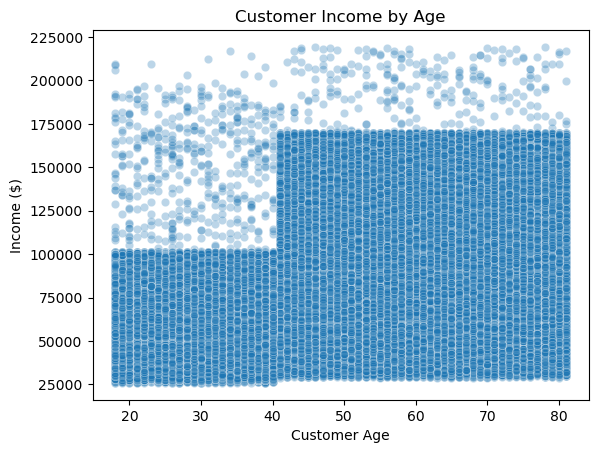

In [109]:
scatterplot_5 = sns.scatterplot(data=customers_filtered, x='age', y='income', alpha=0.3)

plt.title('Customer Income by Age', fontsize=12)
plt.xlabel('Customer Age', fontsize=10)
plt.ylabel('Income ($)', fontsize=10)
plt.show()

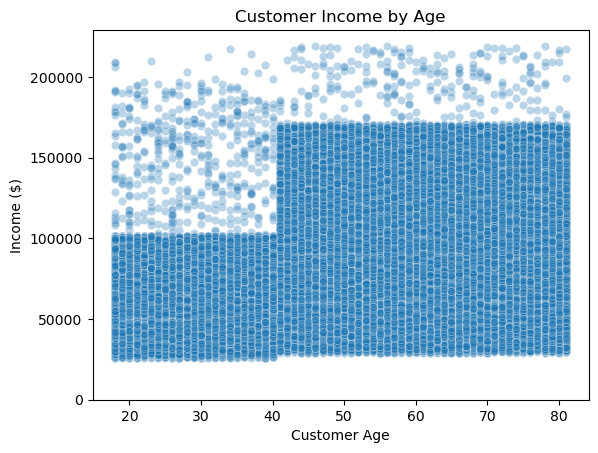

In [110]:
scatterplot_6 = sns.scatterplot(data=customers_filtered, 
                                x='age', y='income', alpha=0.3)

plt.title('Customer Income by Age', fontsize=12)
plt.xlabel('Customer Age', fontsize=10)
plt.ylabel('Income ($)', fontsize=10)

plt.ylim(0)   # Y-axis to start at 0
plt.show()

Most customers earn between `$30K` and `$175K`, with a very dense cluster of incomes in this range. Younger customers (under 40) show slightly more spread, while the bulk of points from age 40 onward are tightly packed, indicating most customers in all age groups fall within similar mid-income levels.”

In [37]:
df_departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


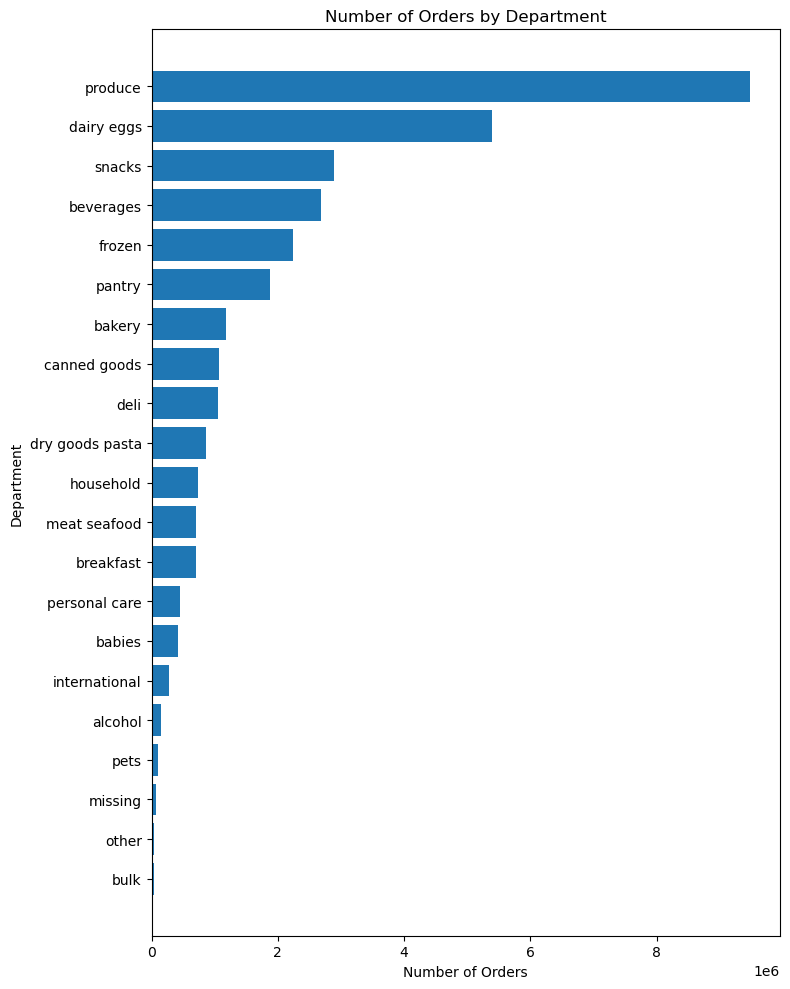

In [39]:
# Rename the ID column in the departments DataFrame
df_departments = df_departments.rename(columns={'Unnamed: 0': 'department_id'})

# Count number of orders per department_id
dept_counts = (
    df_ords_prods_customers['department_id']
    .value_counts()
    .rename_axis('department_id')
    .reset_index(name='orders_count')
)

# Merge counts with department names
dept_counts = dept_counts.merge(df_departments, on='department_id', how='left')

# Sort by number of orders in descending order
dept_counts = dept_counts.sort_values('orders_count', ascending=False)

# Create horizontal bar chart: "Number of Orders by Department"
plt.figure(figsize=(8,10))
plt.barh(dept_counts['department'], dept_counts['orders_count'])
plt.gca().invert_yaxis()  # Highest values at the top

# Add labels and title
plt.title('Number of Orders by Department')
plt.xlabel('Number of Orders')
plt.ylabel('Department')

plt.tight_layout()

# Save the chart in 300 dpi
plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'barchart_orders_by_department.png'),
    dpi=300
)

# Display the chart
plt.show()

# 05 Export your visualizations as “.png” files in your relevant project folder.


In [6]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_1'))

In [113]:
scatterplot_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'scatterplot_1'))

In [114]:
scatterplot_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'scatterplot_2'))

In [115]:
linechart_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'linechart_1'))

In [116]:
histogram_orders_hour.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'histogram_orders_hour'))

In [41]:
bar_loyalty.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_loyalty'))

In [118]:
linechart_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'linechart_2'))

In [119]:
linechart_3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'linechart_3'))

In [120]:
scatterplot_4.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'scatterplot_4'))

In [121]:
scatterplot_5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'scatterplot_5'))

In [122]:
scatterplot_6.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'scatterplot_6'))